In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_cst = pd.read_csv('/content/drive/MyDrive/프로젝트1/olist_customers_dataset.csv')
df_order = pd.read_csv('/content/drive/MyDrive/프로젝트1/olist_orders_dataset.csv')
df_review = pd.read_csv('/content/drive/MyDrive/프로젝트1/olist_order_reviews_dataset.csv')
df_item = pd.read_csv('/content/drive/MyDrive/프로젝트1/olist_order_items_dataset.csv')

df_order
#df_order 원본

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [3]:
#지연(is_delayed, delay_days) 열 추가 (3일 이상 지연된)
df_order['order_delivered_customer_date'] = pd.to_datetime(
    df_order['order_delivered_customer_date'], errors='coerce'
)
df_order['order_estimated_delivery_date'] = pd.to_datetime(
    df_order['order_estimated_delivery_date'], errors='coerce'
)

df_order['delay_timedelta'] = (
    df_order['order_delivered_customer_date'] - df_order['order_estimated_delivery_date']
)

df_order['delay_days'] = df_order['delay_timedelta'].dt.total_seconds() / 86400


df_order['is_delayed'] = df_order['delay_timedelta'] >= pd.Timedelta(days=3)

/tmp/ipython-input-68554603.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['delay_bucket'] = pd.cut(


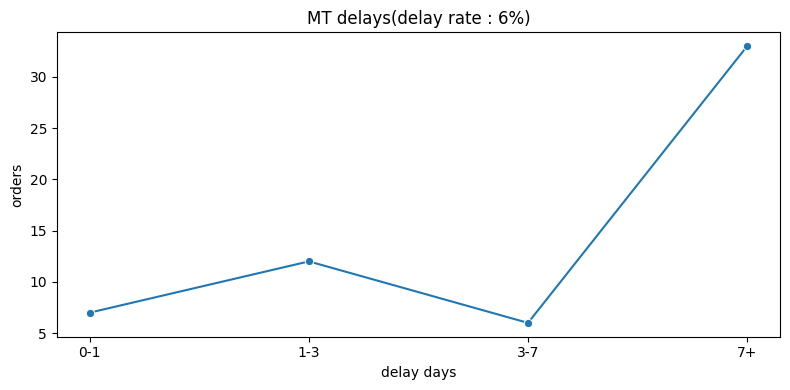

In [22]:
#customer_id의 주와 머지함
order_cols = ['order_id', 'customer_id', 'delay_days', 'is_delayed']
cst_cols = ['customer_id', 'customer_state']

tmp = df_review.merge(
    df_order[order_cols],
    on='order_id',
    how='left',
    validate='m:1'
)

df_review_enriched = tmp.merge(
    df_cst[cst_cols],
    on='customer_id',
    how='left',
    validate='m:1'
)


df = df_review_enriched
mdf = df[df['customer_state'] == "MT"]


bins = [0, 1, 3, 7, float('inf')]
labels = ['0-1', '1-3', '3-7', '7+']

mdf['delay_bucket'] = pd.cut(
    mdf['delay_days'],
    bins=bins,
    labels=labels,
    right=False  # [0,1), [1,3), [3,7), [7,inf)
)

bucket_counts = (
    mdf['delay_bucket']
    .value_counts(sort=False)   # labels 순서 유지
    .rename_axis('delay_bucket')
    .reset_index(name='n_orders')
)

# 3) 꺾은선 차트
plt.figure(figsize=(8,4))
ax = sns.lineplot(
    data=bucket_counts,
    x='delay_bucket',
    y='n_orders',
    marker='o'
)
ax.set_title('MT delays(delay rate : 6%)')
ax.set_xlabel('delay days')
ax.set_ylabel('orders')
plt.tight_layout()
plt.show()

In [5]:
freight_by_order = (
    df_item.groupby('order_id', as_index=False)
           .agg(freight_value=('freight_value', 'sum'))
)

df_review_enriched = df_review_enriched.merge(
    freight_by_order,
    on='order_id',
    how='left',
    validate='m:1'
)


df = df_review_enriched
df[df['is_delayed']==True].value_counts().sum()

#freight와 머지

np.int64(493)

In [6]:
from numpy import is_busday

df['abs_delay_days'] = df['delay_days'].abs()
df['is_delayed'] = df['delay_days'].gt(0)
df['delay_days_pos'] = df['delay_days'].clip(lower=0)

state_kpi = (
    df.groupby('customer_state', as_index=False)
      .agg(
          n_orders=('order_id', 'nunique'),
          avg_delay_days=('delay_days', 'mean'),                # 기존(조기배송 포함 평균)
          delay_rate=('is_delayed', 'mean'),
          avg_delay_when_delayed=('delay_days_pos', lambda s: s[s > 0].mean()),
          avg_score=('review_score', 'mean'),
          avg_freight=('freight_value', 'mean')
      )
)

state_kpi.sort_values('n_orders', ascending=False).reset_index(drop=True)
kpi_map = state_kpi
kpi_map

#kpi

,customer_state,n_orders,avg_delay_days,delay_rate,avg_delay_when_delayed,avg_score,avg_freight
0,AC,81,-20.077007,0.037037,19.034460,4.049383,45.515432
1,AL,410,-8.147745,0.224638,9.322666,3.751208,38.585388
2,AM,146,-18.866970,0.040816,20.895529,4.183673,37.346164
3,AP,67,-19.091452,0.044776,48.862674,4.194030,41.254030
4,BA,3340,-10.190926,0.133155,10.989718,3.860888,29.804634
5,CE,1326,-10.173555,0.146727,14.145186,3.851016,36.538742
6,DF,2128,-11.302744,0.069367,6.562205,4.064711,23.813845
7,ES,2006,-9.986137,0.116567,9.693157,4.041667,24.489467
8,GO,2007,-11.559897,0.077569,9.731181,4.042490,26.341253
9,MA,742,-9.036513,0.183646,10.036839,3.764075,42.557199


In [7]:
df_geo = pd.read_excel('/content/drive/MyDrive/프로젝트1/지리별.xlsx')
df_geo

##도메인 데이터 (기본 데이터셋에 없음)

,customer_state,Area,Infra,Security,Dist,Dan_avg,Key_Driver
0,AM,NE,10.0,3.0,10.0,7.67,인프라 붕괴 + 육로 단절
1,RR,NE,9.5,2.0,10.0,7.17,"극단적 거리, 고립"
2,AC,NE,9.8,2.0,9.5,7.10,최장 육로 거리
3,AP,NE,9.5,2.0,9.8,7.10,육로 접근 불가 (기아나 접경)
4,PA,NE,9.0,4.0,8.0,7.00,열악한 도로 + 거대한 면적
5,MA,SE,8.5,3.5,8.0,6.67,도로 품질 최악 (북동부)
6,RO,NE,8.0,2.5,8.5,6.33,장거리 운송 한계
7,PE,SE,7.0,5.0,7.0,6.33,도난 급증 + 거리
8,BA,SE,7.0,5.5,6.0,6.17,치안 악화 + 인프라
9,PI,SE,7.5,3.0,7.5,6.00,인프라 부족


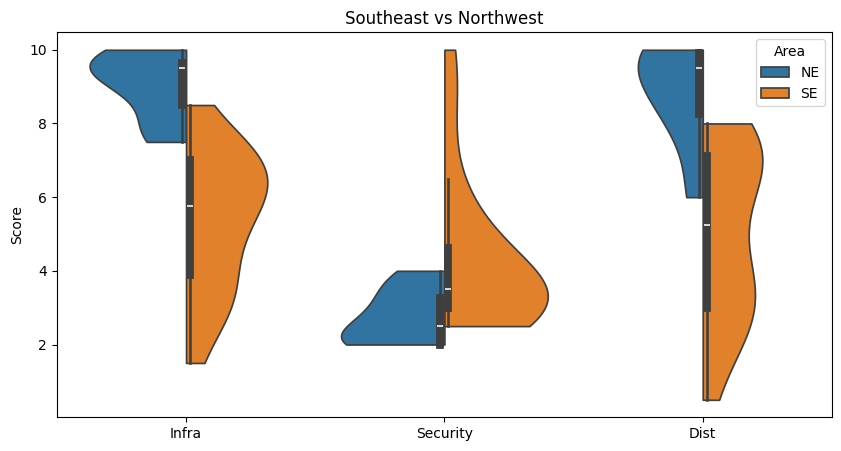

In [8]:
cols = ['Infra', 'Security', 'Dist']

area_summary = (
    df_geo
    .groupby('Area')[cols]
    .agg(['mean'])
    .sort_index()
)

area_summary

df_long = df_geo.melt(id_vars='Area', value_vars=cols,
                      var_name='factor', value_name='score')

plt.figure(figsize=(10,5))
sns.violinplot(
    data=df_long, x='factor', y='score', hue='Area',
    split=True, inner='box', cut=0
)
plt.title('Southeast vs Northwest')
plt.xlabel('')
plt.ylabel('Score')
plt.legend(title='Area')
plt.show()


#북서부, 남동부 도메인

In [9]:
kpi_map

,customer_state,n_orders,avg_delay_days,delay_rate,avg_delay_when_delayed,avg_score,avg_freight
0,AC,81,-20.077007,0.037037,19.034460,4.049383,45.515432
1,AL,410,-8.147745,0.224638,9.322666,3.751208,38.585388
2,AM,146,-18.866970,0.040816,20.895529,4.183673,37.346164
3,AP,67,-19.091452,0.044776,48.862674,4.194030,41.254030
4,BA,3340,-10.190926,0.133155,10.989718,3.860888,29.804634
5,CE,1326,-10.173555,0.146727,14.145186,3.851016,36.538742
6,DF,2128,-11.302744,0.069367,6.562205,4.064711,23.813845
7,ES,2006,-9.986137,0.116567,9.693157,4.041667,24.489467
8,GO,2007,-11.559897,0.077569,9.731181,4.042490,26.341253
9,MA,742,-9.036513,0.183646,10.036839,3.764075,42.557199


In [10]:
kpi_map

map_area = df_geo[['customer_state', 'Area', 'Infra',	'Security','Dist']].drop_duplicates()
kpi_map = kpi_map.merge(map_area, on='customer_state', how='left')
kpi_map

,customer_state,n_orders,avg_delay_days,delay_rate,avg_delay_when_delayed,avg_score,avg_freight,Area,Infra,Security,Dist
0,AC,81,-20.077007,0.037037,19.034460,4.049383,45.515432,NE,9.8,2.0,9.5
1,AL,410,-8.147745,0.224638,9.322666,3.751208,38.585388,SE,5.5,3.5,7.0
2,AM,146,-18.866970,0.040816,20.895529,4.183673,37.346164,NE,10.0,3.0,10.0
3,AP,67,-19.091452,0.044776,48.862674,4.194030,41.254030,NE,9.5,2.0,9.8
4,BA,3340,-10.190926,0.133155,10.989718,3.860888,29.804634,SE,7.0,5.5,6.0
5,CE,1326,-10.173555,0.146727,14.145186,3.851016,36.538742,SE,6.5,3.5,7.5
6,DF,2128,-11.302744,0.069367,6.562205,4.064711,23.813845,SE,3.0,3.0,4.0
7,ES,2006,-9.986137,0.116567,9.693157,4.041667,24.489467,SE,4.0,4.0,3.0
8,GO,2007,-11.559897,0.077569,9.731181,4.042490,26.341253,SE,5.0,4.5,4.0
9,MA,742,-9.036513,0.183646,10.036839,3.764075,42.557199,SE,8.5,3.5,8.0


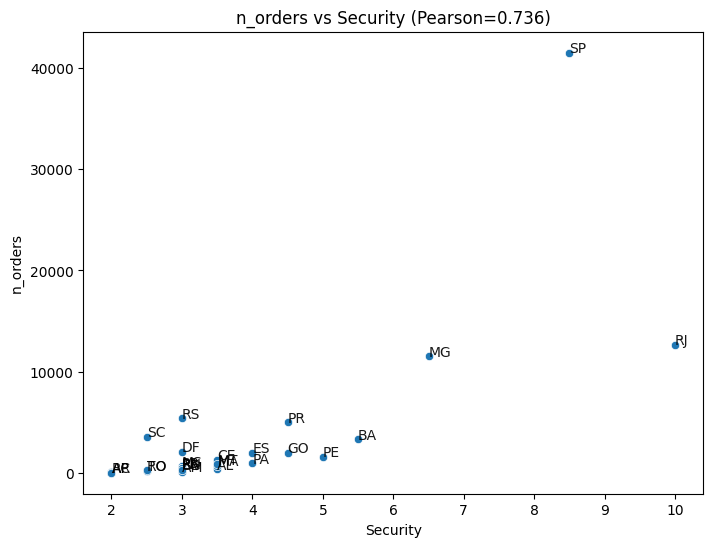

In [11]:
import numpy as np
cols = ['Infra', 'Security', 'Dist']

kpi_map['delay_bucket'] = np.where(kpi_map['delay_rate'] > 0.1, '>0.1', '<=0.1')

pt = kpi_map.pivot_table(
    index='delay_bucket',
    values=cols,
    aggfunc='mean'
)

pt

corr_pearson = kpi_map[cols].corr(method='pearson')
corr_pearson



df_corr = (
    kpi_map[['customer_state', 'n_orders', 'Security']]
    .dropna(subset=['n_orders', 'Security'])
    .copy()
)

pearson = df_corr['n_orders'].corr(df_corr['Security'], method='pearson')

plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=df_corr, x='Security', y='n_orders')

for _, r in df_corr.iterrows():
    ax.text(r['Security'], r['n_orders'], str(r['customer_state']), fontsize=10, alpha=0.9)

ax.set_title(f'n_orders vs Security (Pearson={pearson:.3f})')
ax.set_xlabel('Security')
ax.set_ylabel('n_orders')
plt.show()


# 주문량 - 보안 관계

In [12]:

cols = ['n_orders', 'delay_rate', 'Security']

corr_pearson = kpi_map[cols].corr(method='pearson')
corr_pearson

,n_orders,delay_rate,Security
n_orders,1.000000,-0.211888,0.735876
delay_rate,-0.211888,1.000000,0.025876
Security,0.735876,0.025876,1.000000


In [13]:

kpi_map['delay_bucket'] = np.where(kpi_map['delay_rate'] < 0.1, '기준점 미만', '기준점 이상')

result = (
    kpi_map
    .groupby('delay_bucket', as_index=False)['avg_score']
    .mean()
    .rename(columns={'avg_score': 'avg_avg_score'})
)

result
#지연율 10% 이상일 때와 미만일 때의 리뷰스코어

,delay_bucket,avg_avg_score
0,기준점 미만,4.115342
1,기준점 이상,3.912135


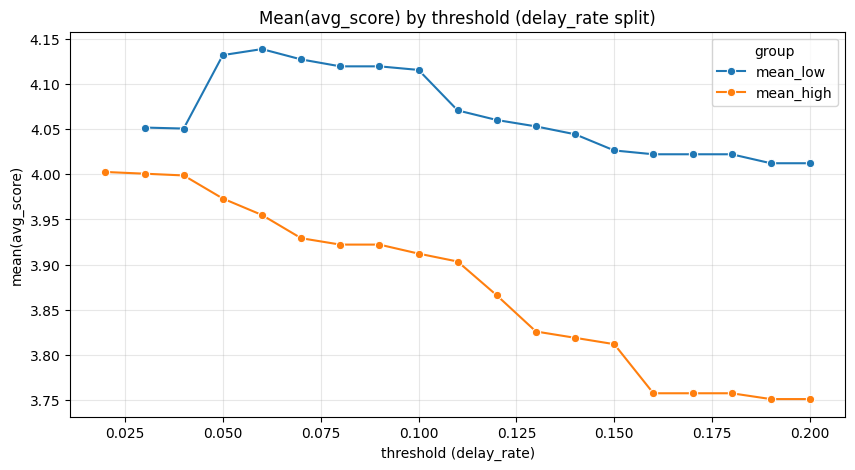

In [14]:
thresholds = np.round(np.arange(0.02, 0.201, 0.01), 2)

rows = []
for t in thresholds:
    low  = kpi_map.loc[kpi_map['delay_rate'] <  t, 'avg_score'].mean()
    high = kpi_map.loc[kpi_map['delay_rate'] >= t, 'avg_score'].mean()
    n_low  = (kpi_map['delay_rate'] <  t).sum()
    n_high = (kpi_map['delay_rate'] >= t).sum()

    rows.append({
        'threshold': t,
        'mean_low': low,
        'mean_high': high,
        'diff_high_minus_low': high - low,
        'n_low': n_low,
        'n_high': n_high
    })

sweep = pd.DataFrame(rows)
sweep

plot_df = sweep.melt(
    id_vars='threshold',
    value_vars=['mean_low', 'mean_high'],
    var_name='group',
    value_name='avg_score_mean'
)

plt.figure(figsize=(10,5))
sns.lineplot(data=plot_df, x='threshold', y='avg_score_mean', hue='group', marker='o')
plt.title('Mean(avg_score) by threshold (delay_rate split)')
plt.xlabel('threshold (delay_rate)')
plt.ylabel('mean(avg_score)')
plt.grid(True, alpha=0.3)
plt.show()


#지연율 n% 이상일 때(노란색)와 n% 미만일 때(파란색)의 리뷰스코어 비교
